# Import required packages
Those required packages are imported in the following.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import seaborn as sns
% matplotlib inline

# Read Data from csv file

In [116]:
traindata = pd.read_csv("train.csv")
testdata = pd.read_csv("test.csv")

### Checking top 5 data for training dataset

In [117]:
traindata.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


### Checking top 5 data for testing dataset

In [118]:
testdata.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


Checking no. of attributes of training data.
Then, remove duplicated tuple in the data, but seems there is no any duplicated tupe.

In [119]:
traindata.shape

(595212, 59)

In [120]:
traindata.drop_duplicates()
traindata.shape

(595212, 59)

Checking no. of attributes of testing data.
Then, calculating the percentage of the result in the target attribute.
The percentage reflected that the result is imbalanced, and the majority of result in target is '0'.

In [121]:
testdata.shape

(892816, 58)

In [122]:
traindata['target'].value_counts(normalize =True)*100

0    96.355248
1     3.644752
Name: target, dtype: float64

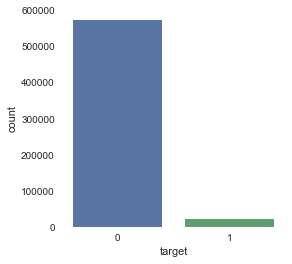

In [123]:
plt.figure(figsize=(4,4))
ax = sns.countplot(traindata.target)
ax.set_facecolor('white')

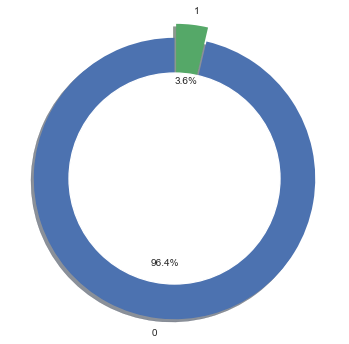

In [124]:
labels = traindata.target.unique()
sizes = traindata.target.value_counts()
explode = (0,0.1)
fig1, ax1 = plt.subplots(figsize = (6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow = True, startangle=90)

centre_circle = plt.Circle((0,0),0.75,color='white', fc='white' ,linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.show()

Validate the data

In [125]:
traindata.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
traindata.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

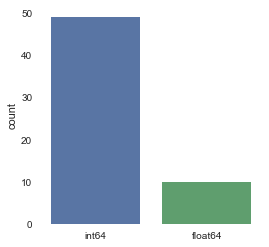

In [127]:
plt.figure(figsize = (4,4))
ax = sns.countplot(traindata.dtypes)
ax.set_facecolor('white')

In [128]:
traindata.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


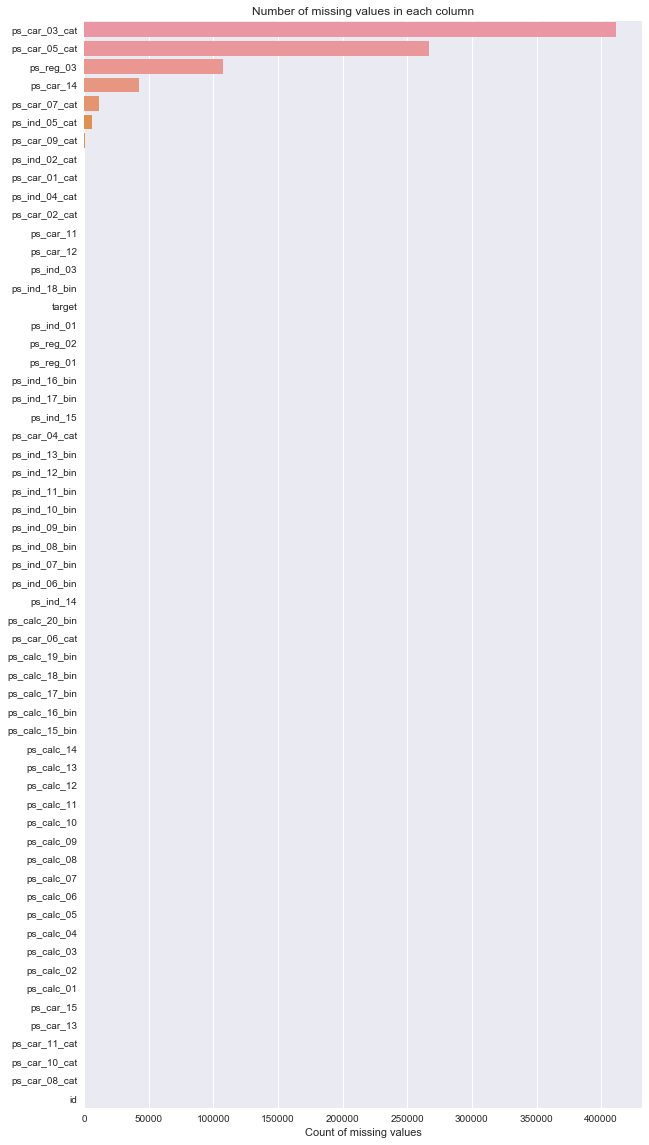

In [129]:
missingdata = np.sum(traindata==-1, axis=0)
missingdata.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 20))
sns.barplot(x=missingdata.values, y=missingdata.index)
plt.title("Number of missing values in each column")
plt.xlabel("Count of missing values")
plt.show()

In [130]:
missingdata_pers = pd.DataFrame(missingdata.values / len(traindata.index)*100, index = missingdata.index)
missingdata_pers.columns=['percentage']
missingdata_pers.head(15)

,percentage
ps_car_03_cat,69.089837
ps_car_05_cat,44.782531
ps_reg_03,18.106490
ps_car_14,7.160474
ps_car_07_cat,1.930237
ps_ind_05_cat,0.975955
ps_car_09_cat,0.095596
ps_ind_02_cat,0.036290
ps_car_01_cat,0.017977
ps_ind_04_cat,0.013945


In [131]:
traindata.drop(['ps_car_03_cat','ps_car_05_cat'],axis=1, inplace=True)
testdata.drop(['ps_car_03_cat','ps_car_05_cat'],axis=1, inplace=True)

In [132]:
traindata.shape

(595212, 57)

In [133]:
testdata.shape

(892816, 56)

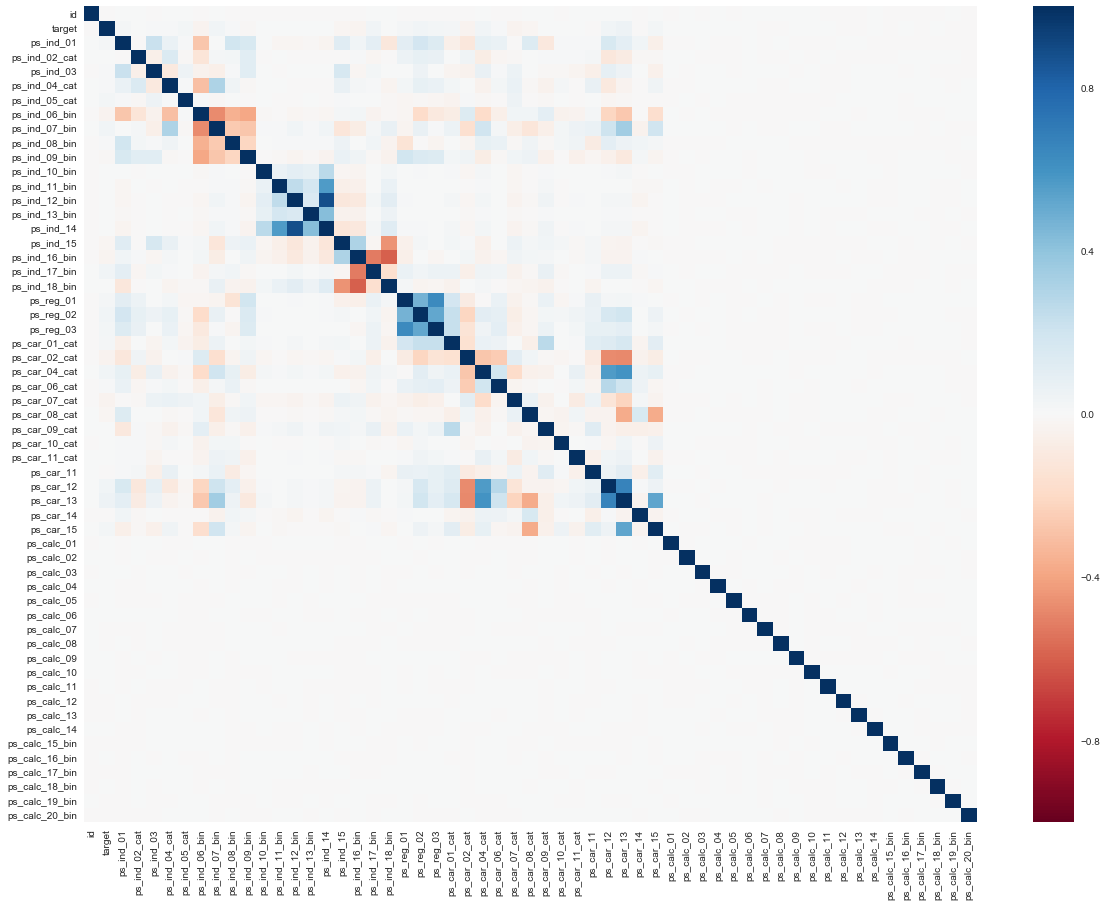

In [134]:
corr = traindata.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr,cmap="RdBu")
plt.show()

In [135]:
droplist = ['id', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
            'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 
            'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 
            'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
traindata.drop(droplist, axis=1, inplace=True)
testdata.drop(droplist, axis=1, inplace=True)

In [136]:
traindata.shape

(595212, 36)

In [137]:
testdata.shape

(892816, 35)

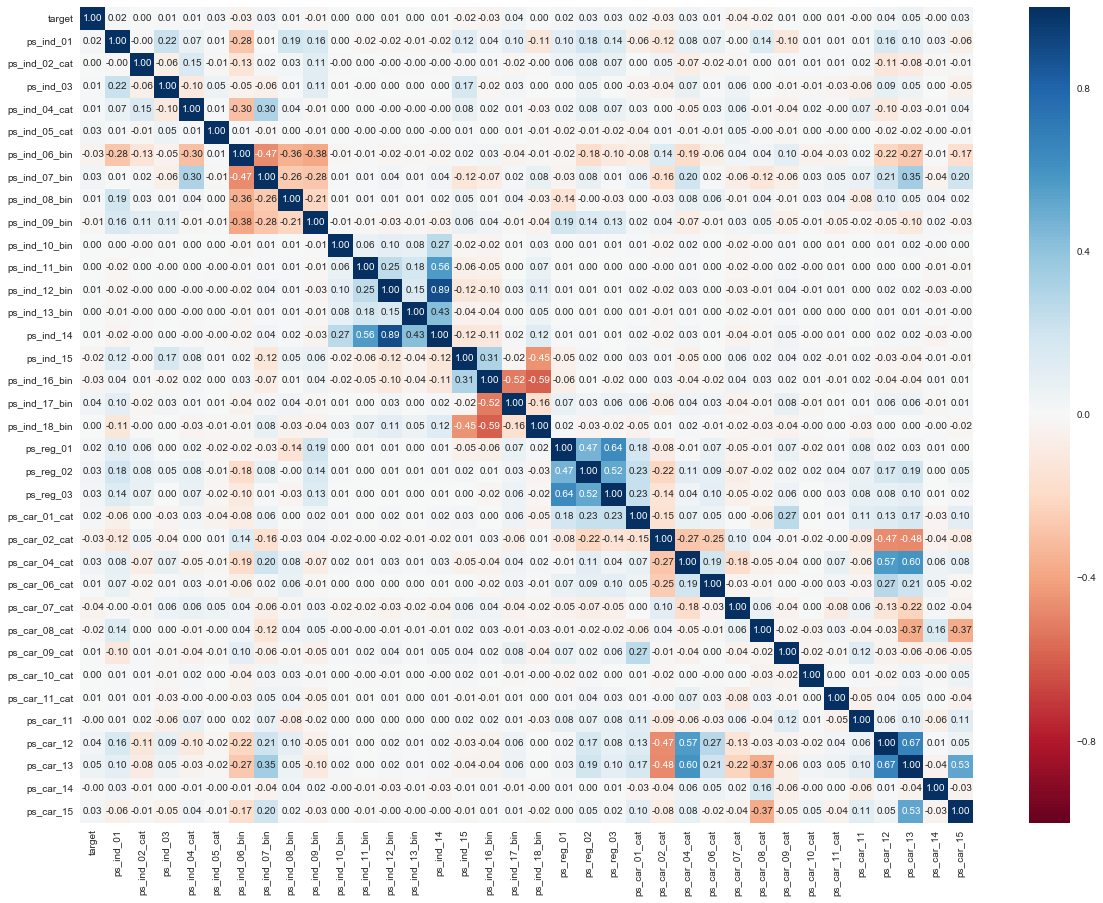

In [138]:
corr = traindata.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, fmt='.2f', annot=True, cmap="RdBu")
plt.show()

# Subsitute '-1' value with meaningful value


In [139]:
data=[]

for f in traindata.columns:
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif traindata[f].dtype == float:
        level = 'interval'
    elif traindata[f].dtype == int:
        level = 'ordinal'
        
    keep = True
    if f == 'id':
        keep = False
    
    dtype = traindata[f].dtype
    
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [140]:
meta

,role,level,keep,dtype
varname,,,,
target,target,binary,True,int64
ps_ind_01,input,binary,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64
ps_ind_08_bin,input,binary,True,int64


In [141]:
# Update the missingdata dataframe
missingdata = np.sum(traindata==-1, axis=0)
missingdata.sort_values(ascending=False, inplace=True)

print('Missing data are including the followings column:')
for miss in missingdata.index:
    if missingdata[miss] > 0:
        print('Name: {}, Lvl: {} '.format(miss,meta.level[miss]))

Missing data are including the followings column:
Name: ps_reg_03, Lvl: interval 
Name: ps_car_14, Lvl: interval 
Name: ps_car_07_cat, Lvl: nominal 
Name: ps_ind_05_cat, Lvl: nominal 
Name: ps_car_09_cat, Lvl: nominal 
Name: ps_ind_02_cat, Lvl: nominal 
Name: ps_car_01_cat, Lvl: nominal 
Name: ps_ind_04_cat, Lvl: nominal 
Name: ps_car_11, Lvl: nominal 
Name: ps_car_02_cat, Lvl: nominal 
Name: ps_car_12, Lvl: interval 


For interval data, we better substite -1 value with its mean. <br>
For nominal data, we better substite -1 value with its mode.

In [142]:
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
traindata['ps_reg_03'] = mean_imp.fit_transform(traindata[['ps_reg_03']]).ravel()
traindata['ps_car_12'] = mean_imp.fit_transform(traindata[['ps_car_12']]).ravel()
traindata['ps_car_14'] = mean_imp.fit_transform(traindata[['ps_car_14']]).ravel()
traindata['ps_car_11'] = mode_imp.fit_transform(traindata[['ps_car_11']]).ravel()

In [143]:
traindata.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,0.910027,0.832080,1.328890,0.992136,62.215674,2.346105,0.379947,0.813265,0.374691,3.065899
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,0.347106,0.373796,0.978747,0.091619,33.012455,0.832493,0.058300,0.224588,0.043947,0.731366
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.100000,0.250619,0.109545,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.353553,2.828427
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.765811,0.374691,3.316625
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,93.000000,3.000000,0.400000,0.906190,0.396485,3.605551
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,4.000000,2.000000,104.000000,3.000000,1.264911,3.720626,0.636396,3.741657
